# Calculations for several molecules with aug-cc-pVQZ (several basis sets)

In [1]:
from project_3_indicator import run_calculation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
methods = 'CISD'
scanning_props = {'directions':'x','atom_indices':'1', 'end_distance':2}
basis_name=['cc-pVDZ','cc-pVTZ','cc-pVQZ']


In [3]:
def plot_harmonium_indicators_comparison(results,  omega, show_plot=True, save_path=None, n_columns=2):
    """
    Plot ontop vs dynamic indicators comparison for harmonium calculations at a specific omega value,
    including analytic results from CSV data.

    Parameters:
    -----------
    results : dict or list of dict
        Single dictionary or list of dictionaries containing results data, each with:
        - ontop_data: DataFrame with columns [atom, direction, r, ontop, density, indicator_dynamic]
        - basis_name: str, name of basis set
        - method_name: str, name of method
    analytic_data_path : str
        Path to CSV file containing analytic results with columns [R, n, omega, onTop, density]
    omega : float
        Omega value for harmonium to plot
    show_plot : bool, optional
        Whether to display the plot (default True)
    save_path : str, optional
        Path to save the plot (if None, plot is not saved)
    n_columns : int, optional
        Number of columns for multiple direction plots (default 2)

    Returns:
    --------
    fig : matplotlib figure
        The generated comparison plot figure
    """
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import math

    # Try to import IPython display tools
    try:
        from IPython.display import clear_output, display
        in_notebook = True
    except ImportError:
        in_notebook = False
    analytic_data_path = '../utils/harmonium_analytic.csv'
    # Load and filter analytic data for the specified omega
    analytic_df = pd.read_csv(analytic_data_path)
    print(analytic_df)
    analytic_df = analytic_df[np.isclose(analytic_df['omega'], omega, rtol=1e-5)]

    if analytic_df.empty:
        raise ValueError(f"No analytic data found for omega = {omega}")

    # Convert single dictionary to list for uniform processing
    results_list = [results] if isinstance(results, dict) else results

    # Input validation
    if not results_list:
        raise ValueError("Input cannot be empty")

    # Get unique directions from the first valid result
    directions = sorted(results_list[0]['ontop_data']['direction'].unique())
    n_directions = len(directions)

    # Calculate number of rows needed
    n_rows = math.ceil(n_directions / n_columns)

    # Create plot with subplots
    fig, axes = plt.subplots(n_rows, min(n_directions, n_columns),
                            figsize=(6*min(n_directions, n_columns), 6*n_rows),
                            squeeze=False)

    # Flatten axes for easier iteration
    axes_flat = axes.flatten()

    colors = ['b', 'r', 'g', 'm', 'c', 'y']  # Color cycle

    # Plot data for each calculation
    for i, result in enumerate(results_list):
        df = result['ontop_data']
        method = result['method_name']
        basis = result['basis_name']
        color = colors[i % len(colors)]

        # Calculate indicators
        df['X(r)'] = 2 * df['ontop'] / (df['density']**2)
        df['X_dyn(r)'] = df['indicator_dynamic']

        # Plot for each direction
        for dir_idx, direction in enumerate(directions):
            ax = axes_flat[dir_idx]
            direction_data = df[df['direction'] == direction]
            positive_mask = direction_data['r'] >= 0

            # Plot calculated indicators
            ax.plot(direction_data[positive_mask]['r'],
                   direction_data[positive_mask]['X(r)'],
                   f'{color}-', linewidth=2, label=f'X(r) - {method}/{basis}')
            ax.plot(direction_data[positive_mask]['r'],
                   direction_data[positive_mask]['X_dyn(r)'],
                   f'{color}--', linewidth=2, label=f'I_D(r) - {method}/{basis}')

            # Plot analytic result in black (only once per direction)
            if i == 0:
                X_analytic = 2 * analytic_df['onTop'] / (analytic_df['density']**2)
                ax.plot(analytic_df['R'], X_analytic, 'k-',
                       linewidth=2, label='Analytic')

    # Add title and customize each subplot
    fig.suptitle(f'Harmonium Indicators (ω = {omega:.3f})', fontsize=16)

    for idx, (direction, ax) in enumerate(zip(directions, axes_flat)):
        ax.set_xlabel('r (Å)', fontsize=12)
        ax.set_ylabel('Indicator Value', fontsize=12)
        ax.set_title(f'Direction {direction}', fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.margins(x=0.02)
        ax.legend(fontsize=10, loc='upper right')

    # Hide empty subplots if any
    for idx in range(len(directions), len(axes_flat)):
        axes_flat[idx].set_visible(False)

    fig.tight_layout(pad=2.0)

    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show if requested
    if show_plot:
        if in_notebook:
            clear_output(wait=True)
            display(fig)
        else:
            plt.show()

    return fig

## Harmonium

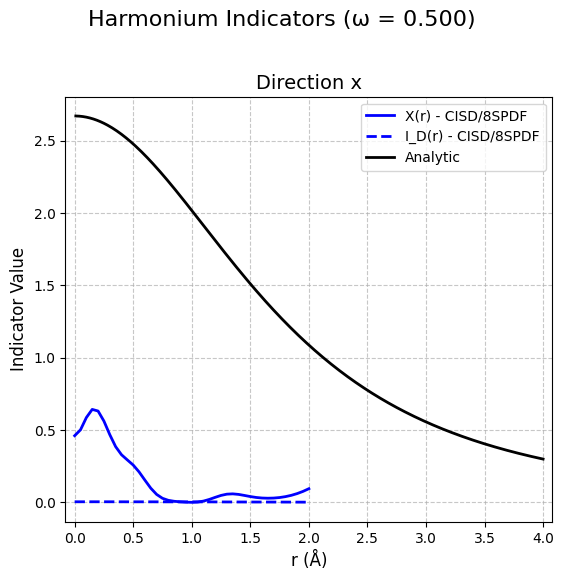

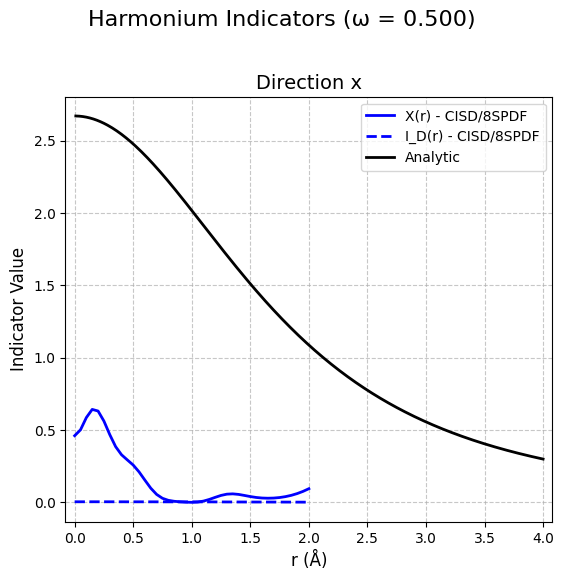

In [5]:
results = run_calculation(
    molecule_name="harmonium",
    omega=0.03653726559926414,
    method_name=methods,
    basis_name='8SPDF',
    scanning_props=scanning_props
)

fig = plot_harmonium_indicators_comparison(results, 0.03653726559926414)


In [2]:
def plot_harmonium_comparison(low_corr_results, high_corr_results, show_plot=True, save_path=None):
    """
    Plot harmonium indicators comparison for two different omega values (low correlation vs high correlation)
    with enhanced aesthetics.

    Parameters:
    -----------
    low_corr_results : list of dict
        List of dictionaries containing results data for low correlation regime (ω = 0.5)
    high_corr_results : list of dict
        List of dictionaries containing results data for high correlation regime (ω = 0.03654)
    show_plot : bool, optional
        Whether to display the plot (default True)
    save_path : str, optional
        Path to save the plot (if None, plot is not saved)

    Returns:
    --------
    fig : matplotlib figure
        The generated comparison plot figure
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    # Try to import IPython display tools
    try:
        from IPython.display import clear_output, display
        in_notebook = True
    except ImportError:
        in_notebook = False

    # Set up the plot style with larger elements for presentation
    plt.rcParams.update({
        'font.size': 14,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'legend.fontsize': 14,
        'lines.linewidth': 3
    })

    # Define colors
    colors = {
        'charcoal': '#333333',
        'amethyst': '#786EAE',  # CASSCF
        'goldenrod': '#C29044',  # CISD
        'midnight': '#001B44',   # Analytic
        'crimson': '#DC143C'     # Extra color if needed
    }

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.patch.set_alpha(0.0)  # Transparent background
    ax1.patch.set_alpha(0.0)  # Transparent plot background
    ax2.patch.set_alpha(0.0)  # Transparent plot background

    # Create secondary axes for logarithmic scales
    ax1_twin = ax1.twinx()
    ax1_twin.patch.set_alpha(0.0)
    ax2_twin = ax2.twinx()
    ax2_twin.patch.set_alpha(0.0)

    # Method labels and colors
    method_labels = {
        'CISD': 'CISD',
        'CASSCF(2,2)': 'CASSCF(2,2)'
    }

    color_map = {
        'CISD': colors['goldenrod'],
        'CASSCF(2,2)': colors['amethyst'],
        'Analytic': colors['midnight']
    }

    # Store handles for legend
    handles = []
    labels = []

    # Load analytic data for both omega values
    # For ω = 0.5 (low correlation)
    try:
        analytic_low = pd.read_csv('../utils/harmonium_analytic.csv')
        analytic_low = analytic_low[np.isclose(analytic_low['omega'], 0.5, rtol=1e-5)]
        has_analytic_low = not analytic_low.empty
    except:
        has_analytic_low = False
        print("Warning: Could not load analytic data for ω = 0.5")

    # For ω = 0.03654 (high correlation)
    try:
        analytic_high = pd.read_csv('../utils/harmonium_analytic.csv')
        omega_high = 0.03653726559926414
        analytic_high = analytic_high[np.isclose(analytic_high['omega'], omega_high, rtol=1e-5)]
        has_analytic_high = not analytic_high.empty
    except:
        has_analytic_high = False
        print("Warning: Could not load analytic data for ω ≈ 0.03654")

    # Plot low correlation data (ω = 0.5) on left subplot
    for result in low_corr_results:
        df = result['ontop_data']
        method = result['method_name']

        # Extract the z direction data (assuming 'z' is the harmonium direction of interest)
        direction_data = df[df['direction'] == 'x']
        positive_mask = direction_data['r'] >= 0

        # Calculate indicators
        direction_data['X(r)'] = 2 * direction_data['ontop'] / (direction_data['density']**2)

        # Plot X(r)
        line1, = ax1.plot(direction_data[positive_mask]['r'],
                direction_data[positive_mask]['X(r)'],
                color=color_map[method], linewidth=3,
                label=f'X(r) - {method_labels[method]}')

        # Plot dynamic indicator if available
        if 'indicator_dynamic' in direction_data.columns:
            line2, = ax1_twin.plot(direction_data[positive_mask]['r'],
                         direction_data[positive_mask]['indicator_dynamic'],
                         color=color_map[method], linewidth=2, linestyle='--', alpha=0.8,
                         label=f'$I_D$ - {method_labels[method]}')

            # Add to handles and labels for the first method only
            if method == 'CISD':
                handles.append(line2)
                labels.append(f'$I_D$ - {method_labels[method]}')

        # Add to legend
        handles.append(line1)
        labels.append(f'X(r) - {method_labels[method]}')

    # Plot analytic data for low correlation if available
    if has_analytic_low:
        X_analytic_low = 2 * analytic_low['onTop'] / (analytic_low['density']**2)
        line_analytic_low, = ax1.plot(analytic_low['onTop'], X_analytic_low,
                         color=colors['midnight'], linewidth=3, linestyle='-',
                         label='Analytic')
        handles.append(line_analytic_low)
        labels.append('Analytic')

    # Plot high correlation data (ω = 0.03654) on right subplot
    for result in high_corr_results:
        df = result['ontop_data']
        method = result['method_name']

        # Extract the z direction data
        direction_data = df[df['direction'] == 'x']
        positive_mask = direction_data['r'] >= 0

        # Calculate indicators
        direction_data['X(r)'] = 2 * direction_data['ontop'] / (direction_data['density']**2)

        # Plot X(r)
        ax2.plot(direction_data[positive_mask]['r'],
                direction_data[positive_mask]['X(r)'],#['X(r)'],
                color=color_map[method], linewidth=3,
                label=f'X(r) - {method_labels[method]}')

        # Plot dynamic indicator if available
        if 'indicator_dynamic' in direction_data.columns:
            ax2_twin.plot(direction_data[positive_mask]['r'],
                         direction_data[positive_mask]['indicator_dynamic'],
                         color=color_map[method], linewidth=2, linestyle='--', alpha=0.8,
                         label=f'$I_D$ - {method_labels[method]}')

    # Plot analytic data for high correlation if available
    if has_analytic_high:
        X_analytic_high = (2 * analytic_high['onTop'] / (analytic_high['density']**2))
        ax2.plot(analytic_high['R'], X_analytic_high,
                color=colors['midnight'], linewidth=3, linestyle='-',
                label='Analytic')

    # Add reference line at y = 1
    ax1.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)
    ax2.axhline(y=1, color=colors['charcoal'], linewidth=1, linestyle='-', alpha=0.5)

    ax1.set_xlim(0, 2)
    ax2.set_xlim(0, 2)
    # Customize first subplot (low correlation)
    ax1.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax1.set_ylabel('X(r)', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax1.set_title('Low Correlation (ω = 0.5)',
               fontsize=18, color=colors['charcoal'], fontweight='bold', pad=10)
    ax1.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax1.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Set logarithmic scale for secondary axis and invert it
    ax1_twin.set_ylabel('$I_D$', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax1_twin.set_yscale('log')
    ax1_twin.invert_yaxis()  # Invert the axis
    ax1_twin.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Customize second subplot (high correlation)
    ax2.set_xlabel('r (Å)', color=colors['charcoal'], fontweight='bold')
    ax2.set_ylabel('X(r)', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax2.set_title('High Correlation (ω = 0.03654)',
               fontsize=18, color=colors['charcoal'], fontweight='bold', pad=10)
    ax2.grid(True, linestyle='--', alpha=0.3, color=colors['charcoal'])
    ax2.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Set logarithmic scale for secondary axis and invert it
    ax2_twin.set_ylabel('$I_D$', color=colors['charcoal'], fontweight='bold', rotation=0, loc='top')
    ax2_twin.set_yscale('log')
    ax2_twin.invert_yaxis()  # Invert the axis
    ax2_twin.tick_params(colors=colors['charcoal'], width=2, length=6)

    # Auto-adjust y-limits based on data

        # If there's an issue with auto-limits, set reasonable defaults
    ax1.set_ylim(0, 1.1)
    ax2.set_ylim(0, 1.1)

    # Make axis lines more visible for all axes
    for ax in [ax1, ax2, ax1_twin, ax2_twin]:
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        ax.minorticks_on()
        ax.tick_params(which='minor', length=3, width=1.5)

    # Main title
    fig.suptitle('Harmonium Correlation Comparison',
               fontsize=22, color=colors['charcoal'], fontweight='bold')

    # Add single legend at the bottom
    fig.legend(handles, labels,
              loc='lower center', bbox_to_anchor=(0.5, 0.01),
              ncol=3, frameon=True, facecolor='white',
              edgecolor=colors['charcoal'], fontsize=12)

    plt.tight_layout()
    # Adjust layout to make room for the legend
    plt.subplots_adjust(bottom=0.15)

    # Save if requested
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show if requested
    if show_plot:
        if in_notebook:
            clear_output(wait=True)
            display(fig)
        else:
            plt.show()

    return fig

# Example usage:
# plot_harmonium_comparison(method_results_1, method_results_2)

In [7]:
results_1 = run_calculation(
    molecule_name="harmonium",
    omega=0.5,
    method_name='CISD',
    basis_name='8SPDF',
    scanning_props=scanning_props
)
results_2 = run_calculation(
    molecule_name="harmonium",
    omega=0.03653726559926414,
    method_name='CISD',
    basis_name='8SPDF',
    scanning_props=scanning_props
)


INFO:project_3_indicator.input.specification:Creating input specification for harmonium_CISD_8SPDF
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set '8SPDF'.
INFO:root:Running GaussianCalculation for CALC_000001


Connected to atlas.
Method name: CISD False
Even-tempered coefficients loaded: alpha=0.2372154041, beta=1.4975044397


INFO:root:Command output: drwx------ 1 javidom qchem 0 Feb 25 06:26 /dipc/javidom/proyect-3-indicator/CALC_000001

INFO:root:Command output: 
INFO:root:Created directory: /scratch/javidom/proyect-3-indicator/CALC_000001
INFO:root:Created fresh scratch directory: /scratch/javidom/proyect-3-indicator/CALC_000001


Gaussian input file './test/CALC_000001.com' generated successfully.


INFO:root:Generated Gaussian SLURM script at slurm_scripts/CALC_000001_gaussian.slurm


Uploaded test/CALC_000001.com to /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001.com on the cluster.


INFO:root:Input files prepared for CALC_000001


Uploaded slurm_scripts/CALC_000001_gaussian.slurm to /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001_gaussian.slurm on the cluster.


INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001.com

INFO:root:Moved CALC_000001.com from colony to scratch for CALC_000001
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001_gaussian.slurm

INFO:root:Moved CALC_000001_gaussian.slurm from colony to scratch for CALC_000001
INFO:root:Command output: Submitted batch job 2387332

INFO:root:Submitted job with ID 2387332 for CALC_000001_gaussian
INFO:root:Submitted job 2387332 for CALC_000001_gaussian
INFO:root:Monitoring job 2387332 for CALC_000001_gaussian...
INFO:root:Command output:                JOBID   PARTITION         QOS                  NAME          USER    ST         TIME  NODES  NODELIST(REASON)
             2387332     general     regular  CALC_000001_gaussian       javidom    PD         0:00      1  (Priority)

INFO:root:Job 2387332 for CALC_000001_gaussian still running, checking again in 1 seconds

here


INFO:root:Command output: 
INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001.log

INFO:root:Generated DMN SLURM script at slurm_scripts/CALC_000001_dmn.slurm


Uploaded slurm_scripts/CALC_000001_dmn.slurm to /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001_dmn.slurm on the cluster.


INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001_dmn.slurm

INFO:root:Moved CALC_000001_dmn.slurm from colony to scratch for CALC_000001
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001.log

INFO:root:Moved CALC_000001.log from colony to scratch for CALC_000001
INFO:root:Command output: Submitted batch job 2387333

INFO:root:Submitted job with ID 2387333 for CALC_000001_dmn
INFO:root:Submitted job 2387333 for CALC_000001_dmn
INFO:root:Monitoring job 2387333 for CALC_000001_dmn...
INFO:root:Command output:                JOBID   PARTITION         QOS                  NAME          USER    ST         TIME  NODES  NODELIST(REASON)
             2387333     general     regular       CALC_000001_dmn       javidom    PD         0:00      1  (Priority)

INFO:root:Job 2387333 for CALC_000001_dmn still running, checking again in 1 seconds
INFO:root:Command output:    

Uploaded slurm_scripts/CALC_000001_dm2prim.slurm to /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001_dm2prim.slurm on the cluster.


INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001_dm2prim.slurm

INFO:root:Moved CALC_000001_dm2prim.slurm from colony to scratch for CALC_000001
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001.dm2

INFO:root:Moved CALC_000001.dm2 from colony to scratch for CALC_000001
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001.fchk

INFO:root:Moved CALC_000001.fchk from colony to scratch for CALC_000001
INFO:root:Command output: Submitted batch job 2387334

INFO:root:Submitted job with ID 2387334 for CALC_000001_dm2prim
INFO:root:Submitted job 2387334 for CALC_000001_dm2prim
INFO:root:Monitoring job 2387334 for CALC_000001_dm2prim...
INFO:root:Command output:                JOBID   PARTITION         QOS                  NAME          USER    ST         TIME  NODES  NODELIST(REASON)
             2387334  

INCA input file './test/CALC_000001.inp' generated successfully.


INFO:root:Generated INCA SLURM script at slurm_scripts/CALC_000001_inca.slurm


Uploaded test/CALC_000001.inp to /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001.inp on the cluster.
Uploaded slurm_scripts/CALC_000001_inca.slurm to /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001_inca.slurm on the cluster.


INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001.wfx

INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001.dm2p

INFO:root:Input files prepared for INCA calculation of CALC_000001
INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001.dm2p

INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001_inca.slurm

INFO:root:Moved CALC_000001_inca.slurm from colony to scratch for CALC_000001
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001.inp

INFO:root:Moved CALC_000001.inp from colony to scratch for CALC_000001
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000001/CALC_000001.wfx

INFO:root:Moved CALC_000001.wfx from colony to scratch for CALC_000001
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-

Downloaded /dipc/javidom/proyect-3-indicator/CALC_000001/CALC_000001.log to /home/javi/Desktop/Doctorado/proyect-3-indicator/results/CALC_000001/CALC_000001.log locally.


INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000001/ontop.dat

INFO:root:Found ontop.dat on cluster, downloading...


Downloaded /dipc/javidom/proyect-3-indicator/CALC_000001/ontop.dat to /home/javi/Desktop/Doctorado/proyect-3-indicator/results/CALC_000001/ontop.dat locally.


INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_7.4)


Disconnected from cluster.


INFO:paramiko.transport:Authentication (publickey) successful!
INFO:project_3_indicator.input.specification:Creating input specification for harmonium_CISD_8SPDF
INFO:project_3_indicator.input.specification:Dependencies validated successfully.
INFO:project_3_indicator.input.specification:Using default basis set '8SPDF'.
INFO:root:Running GaussianCalculation for CALC_000002


Connected to atlas.
Method name: CISD False
Even-tempered coefficients loaded: alpha=0.0158004028, beta=1.4008375764


INFO:root:Command output: drwx------ 1 javidom qchem 0 Feb 25 06:26 /dipc/javidom/proyect-3-indicator/CALC_000002

INFO:root:Command output: 
INFO:root:Created directory: /scratch/javidom/proyect-3-indicator/CALC_000002
INFO:root:Created fresh scratch directory: /scratch/javidom/proyect-3-indicator/CALC_000002


Gaussian input file './test/CALC_000002.com' generated successfully.


INFO:root:Generated Gaussian SLURM script at slurm_scripts/CALC_000002_gaussian.slurm


Uploaded test/CALC_000002.com to /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002.com on the cluster.


INFO:root:Input files prepared for CALC_000002


Uploaded slurm_scripts/CALC_000002_gaussian.slurm to /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002_gaussian.slurm on the cluster.


INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002.com

INFO:root:Moved CALC_000002.com from colony to scratch for CALC_000002
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002_gaussian.slurm

INFO:root:Moved CALC_000002_gaussian.slurm from colony to scratch for CALC_000002
INFO:root:Command output: Submitted batch job 2387349

INFO:root:Submitted job with ID 2387349 for CALC_000002_gaussian
INFO:root:Submitted job 2387349 for CALC_000002_gaussian
INFO:root:Monitoring job 2387349 for CALC_000002_gaussian...
INFO:root:Command output:                JOBID   PARTITION         QOS                  NAME          USER    ST         TIME  NODES  NODELIST(REASON)
             2387349     general     regular  CALC_000002_gaussian       javidom     R         0:00      1  atlas-302

INFO:root:Job 2387349 for CALC_000002_gaussian still running, checking again in 1 seconds


here


INFO:root:Command output: 
INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002.log

INFO:root:Generated DMN SLURM script at slurm_scripts/CALC_000002_dmn.slurm


Uploaded slurm_scripts/CALC_000002_dmn.slurm to /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002_dmn.slurm on the cluster.


INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002_dmn.slurm

INFO:root:Moved CALC_000002_dmn.slurm from colony to scratch for CALC_000002
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002.log

INFO:root:Moved CALC_000002.log from colony to scratch for CALC_000002
INFO:root:Command output: Submitted batch job 2387369

INFO:root:Submitted job with ID 2387369 for CALC_000002_dmn
INFO:root:Submitted job 2387369 for CALC_000002_dmn
INFO:root:Monitoring job 2387369 for CALC_000002_dmn...
INFO:root:Command output:                JOBID   PARTITION         QOS                  NAME          USER    ST         TIME  NODES  NODELIST(REASON)
             2387369     general     regular       CALC_000002_dmn       javidom     R         0:01      1  atlas-333

INFO:root:Job 2387369 for CALC_000002_dmn still running, checking again in 1 seconds
INFO:root:Command output:     

Uploaded slurm_scripts/CALC_000002_dm2prim.slurm to /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002_dm2prim.slurm on the cluster.


INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002_dm2prim.slurm

INFO:root:Moved CALC_000002_dm2prim.slurm from colony to scratch for CALC_000002
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002.dm2

INFO:root:Moved CALC_000002.dm2 from colony to scratch for CALC_000002
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002.fchk

INFO:root:Moved CALC_000002.fchk from colony to scratch for CALC_000002
INFO:root:Command output: Submitted batch job 2387370

INFO:root:Submitted job with ID 2387370 for CALC_000002_dm2prim
INFO:root:Submitted job 2387370 for CALC_000002_dm2prim
INFO:root:Monitoring job 2387370 for CALC_000002_dm2prim...
INFO:root:Command output:                JOBID   PARTITION         QOS                  NAME          USER    ST         TIME  NODES  NODELIST(REASON)
             2387370  

INCA input file './test/CALC_000002.inp' generated successfully.


INFO:root:Generated INCA SLURM script at slurm_scripts/CALC_000002_inca.slurm


Uploaded test/CALC_000002.inp to /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002.inp on the cluster.
Uploaded slurm_scripts/CALC_000002_inca.slurm to /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002_inca.slurm on the cluster.


INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002.wfx

INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002.dm2p

INFO:root:Input files prepared for INCA calculation of CALC_000002
INFO:root:Command output: /dipc/javidom/proyect-3-indicator/CALC_000002/CALC_000002.dm2p

INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002_inca.slurm

INFO:root:Moved CALC_000002_inca.slurm from colony to scratch for CALC_000002
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002.inp

INFO:root:Moved CALC_000002.inp from colony to scratch for CALC_000002
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-indicator/CALC_000002/CALC_000002.wfx

INFO:root:Moved CALC_000002.wfx from colony to scratch for CALC_000002
INFO:root:Command output: 
INFO:root:Command output: /scratch/javidom/proyect-3-

Disconnected from cluster.
Exception occurred: <class 'KeyboardInterrupt'>, 


KeyboardInterrupt: 

In [4]:
plot_harmonium_comparison([results_1], [results_2])

NameError: name 'results_1' is not defined